# 内容
- The Ipython notebook
- Scikit-learn toy datasets
- The MLdata.org public repository
- LIBSVM Example
- Loading data directly from CSV or text files
- Scikit-learn sample generators

# The Ipython notebook

In [18]:
# %matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [19]:
boston_dataset = datasets.load_boston()
X_full = boston_dataset.data
Y = boston_dataset.target
print (X_full.shape)
print (Y.shape)

(506, 13)
(506,)


In [20]:
selector = SelectKBest(f_regression, k=1)
selector.fit(X_full, Y)

X = X_full[:, selector.get_support()]
print (X.shape)

(506, 1)


In [21]:
def plot_scatter(X,Y,R=None):
    plt.scatter(X, Y, color='black', facecolors='white', marker='o')
    if R is not None:
        plt.scatter(X, R, color='red', linewidth=0.5)
    plt.show()    

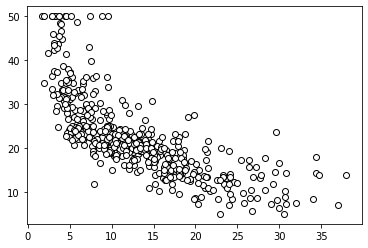

In [29]:
plt.scatter(X, Y, color='black', facecolors='white', marker='o')
plt.show()   

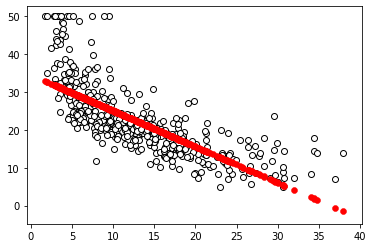

In [34]:
regressor = LinearRegression(normalize=True).fit(X, Y)

plt.scatter(X, Y, color='black', facecolors='white', marker='o')
plt.scatter(X, regressor.predict(X), color='red', linewidth=0.5)
plt.show() 

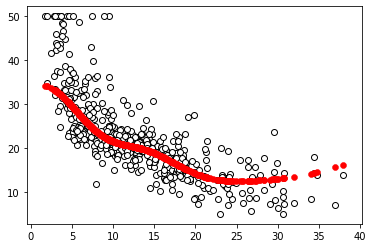

In [35]:
regressor = SVR().fit(X, Y)

plt.scatter(X, Y, color='black', facecolors='white', marker='o')
plt.scatter(X, regressor.predict(X), color='red', linewidth=0.5)
plt.show() 

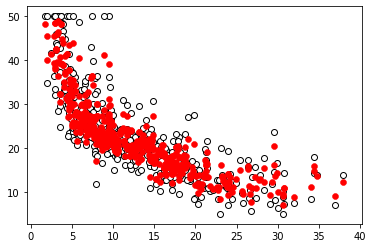

In [37]:
regressor = RandomForestRegressor().fit(X, Y)

plt.scatter(X, Y, color='black', facecolors='white', marker='o')
plt.scatter(X, regressor.predict(X), color='red', linewidth=0.5)
plt.show() 

# Scikit-learn toy datasets

https://scikit-learn.org/stable/datasets/index.html#

In [38]:
from sklearn import datasets
iris = datasets.load_iris()

In [39]:
print (iris.DESCR)
print (iris.data)
print (iris.data.shape)
print (iris.feature_names)
print (iris.target)
print (iris.target.shape)
print (iris.target_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [40]:
print (type(iris.data))

<class 'numpy.ndarray'>


In [41]:
import pandas as pd
import numpy as np
colors = list()
palette = {0: "red", 1: "green", 2: "blue"}

In [42]:
for c in np.nditer(iris.target): colors.append(palette[int(c)])
    # using the palette dictionary, we convert
    # each numeric class into a color string
dataframe = pd.DataFrame(iris.data,  columns=iris.feature_names)

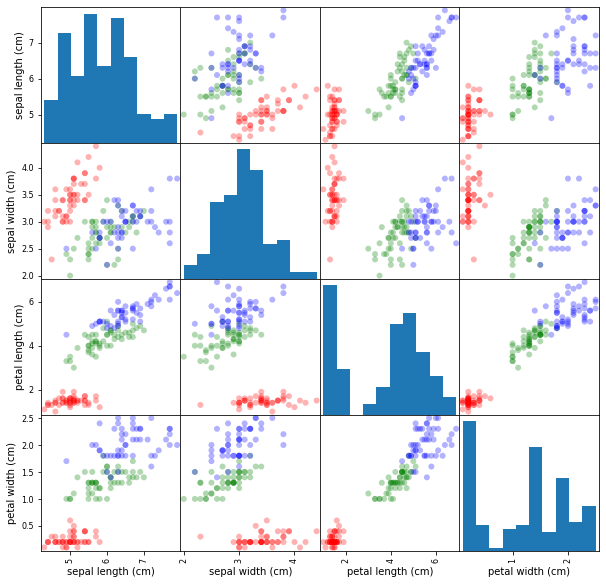

In [44]:
sc = pd.plotting.scatter_matrix(dataframe, alpha=0.3, figsize=(10, 10), diagonal='hist', color=colors, marker='o', grid=True)

# The MLdata.org public repository

https://scikit-learn.org/stable/datasets/index.html#loading-other-datasets

In [51]:
from sklearn.datasets import fetch_openml
iris = fetch_openml('iris')
print (iris.data.shape)

(150, 4)


In [52]:
mice = fetch_openml(name='miceprotein', version=4)

In [53]:
mice.data.shape

(1080, 77)

In [54]:
mice.target.shape

(1080,)

# LIBSVM Example

In [55]:
import urllib
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a'
a2a = urllib.request.urlopen(target_page)

In [56]:
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file(a2a)
print (X_train.shape, y_train.shape)

(1605, 119) (1605,)


# Loading data directly from CSV or text files

In [57]:
housing = np.loadtxt('regression-datasets-housing.csv',delimiter=',')
print (type(housing))

<class 'numpy.ndarray'>


In [58]:
print (housing.shape)

(506, 14)


In [59]:
housing_int = housing.astype(int)

In [60]:
print (housing[0,:3], '\n', housing_int[0,:3])

[6.32e-03 1.80e+01 2.31e+00] 
 [ 0 18  2]


In [61]:
iris_filename = 'datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, sep=',', decimal='.',  \
header=None, names= ['sepal_length', 'sepal_width', 'petal_length', \
'petal_width', 'target'])
print (type(iris))

<class 'pandas.core.frame.DataFrame'>


In [62]:
iris_data = iris.values[:,:4]
iris_target, iris_target_labels = pd.factorize(iris.target)
print (iris_data.shape, iris_target.shape)

(150, 4) (150,)


# Scikit-learn sample generators

In [63]:
from sklearn import datasets # We just import the "datasets" module
X,y = datasets.make_classification(n_samples=10**6, \
n_features=10, random_state=101)
print (X.shape,  y.shape)

(1000000, 10) (1000000,)


In [64]:
datasets.make_classification(1, n_features=4, random_state=101)

(array([[-3.31994186, -2.39469384, -2.35882002,  1.40145585]]), array([0]))

In [65]:
%timeit X,y = datasets.make_classification(n_samples=10**6, \
n_features=10, random_state=101)

610 ms ± 9.41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
